In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import train_test_split

In [2]:
import nltk
from nltk.corpus import stopwords

from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.collocations import *

#spacy.cli.download("en_core_web_sm")

In [3]:
glass_ml = pd.read_csv("glassdoor_ml.csv")

In [4]:
glass_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    841 non-null    int64 
 1   titles        841 non-null    object
 2   companies     841 non-null    object
 3   locations     840 non-null    object
 4   reviews       841 non-null    object
 5   descriptions  841 non-null    object
 6   salaries      841 non-null    object
dtypes: int64(1), object(6)
memory usage: 46.1+ KB


In [5]:
glass_analyst = pd.read_csv("glassdoor_analyst.csv")

In [6]:
glass_analyst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    900 non-null    int64 
 1   titles        900 non-null    object
 2   companies     900 non-null    object
 3   locations     900 non-null    object
 4   reviews       900 non-null    object
 5   descriptions  900 non-null    object
 6   salaries      900 non-null    object
dtypes: int64(1), object(6)
memory usage: 49.3+ KB


In [7]:
glass_data_engineer = pd.read_csv("glassdoor_data_engineer.csv")

In [8]:
df_final = glass_ml.append([glass_analyst,glass_data_engineer],ignore_index=True)
#df_final = glass_ml.append([glass_analyst],ignore_index=True)

C:\Users\sendh\AppData\Local\Temp\ipykernel_3132\141954471.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = glass_ml.append([glass_analyst,glass_data_engineer],ignore_index=True)


In [9]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2701 entries, 0 to 2700
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2701 non-null   int64 
 1   titles        2701 non-null   object
 2   companies     2701 non-null   object
 3   locations     2700 non-null   object
 4   reviews       2701 non-null   object
 5   descriptions  2701 non-null   object
 6   salaries      2701 non-null   object
dtypes: int64(1), object(6)
memory usage: 147.8+ KB


In [10]:
df_final = df_final.drop('Unnamed: 0',axis = 1)

In [11]:
df_final = df_final[df_final.salaries != 'None']

In [12]:
df_final = df_final[df_final.descriptions != 'None']

In [13]:
df_final = df_final.drop_duplicates(keep='first',ignore_index = True)

In [14]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   titles        1871 non-null   object
 1   companies     1871 non-null   object
 2   locations     1870 non-null   object
 3   reviews       1871 non-null   object
 4   descriptions  1871 non-null   object
 5   salaries      1871 non-null   object
dtypes: object(6)
memory usage: 87.8+ KB


In [15]:
df_final

,titles,companies,locations,reviews,descriptions,salaries
0,CAD Customization,Actalent,Chennai,3.6,Description:\n1. Hands-on expertise in develop...,₹4L - ₹7L (Glassdoor Est.)
1,Advisor-Data Science,Dell Technologies,Bengaluru,4.3,"As a Data Scientist, you will have a crucial r...",₹3L - ₹7L (Glassdoor Est.)
2,AI/ML Engineering Intern,Lizmotors Mobility Pvt Ltd.,Remote,None,"At Lizmotors, we're at the forefront of the te...",₹15T - ₹25T (Employer Est.)
3,Senior Advisor - Machine Learning Engineer,Dell Technologies,Bengaluru,4.3,Data Science is all about breaking new ground ...,₹6L - ₹9L (Glassdoor Est.)
4,Data Science Consultant- AI Product Manager,Dell Technologies,Bengaluru,4.3,Data Science is all about breaking new ground ...,₹6L - ₹8L (Glassdoor Est.)
...,...,...,...,...,...,...
1866,Android Developer,Meiro Mobility Private Limited,Ahmedabad,None,About the Role\nDeveloping app functionalities...,₹4L - ₹5L (Employer Est.)
1867,Product Innovation Lead,Gemini Software Solutions,Thiruvananthapuram,None,Position Name: Product Innovation Lead\nLocati...,₹5L - ₹6L (Glassdoor Est.)
1868,Senior Software Engineer,Vedicastrologer.ai,Bengaluru,None,Please note the following information:\nWe are...,₹10T - ₹15T (Employer Est.)
1869,Sr Power Bi Support Engineer,Serendipity Corporate Services,Pune,None,Responsibilities\nMonitor BIE nightly data pip...,₹22L (Employer Est.)


In [16]:
'''
def check_software(a):
    if re.search('software+\sengineer', a, re.IGNORECASE) != None:
        return False
    else :
        return True '''
    

"\ndef check_software(a):\n    if re.search('software+\\sengineer', a, re.IGNORECASE) != None:\n        return False\n    else :\n        return True "

In [17]:
'''df_final[df_final['titles'].map(check_software)]['titles'] '''

"df_final[df_final['titles'].map(check_software)]['titles'] "

In [18]:
#df_final = df_final[df_final['titles'].map(check_software)]

In [19]:
df_final.salaries.unique()

array(['₹4L - ₹7L (Glassdoor Est.)', '₹3L - ₹7L (Glassdoor Est.)',
       '₹15T - ₹25T (Employer Est.)', '₹6L - ₹9L (Glassdoor Est.)',
       '₹6L - ₹8L (Glassdoor Est.)', '₹5L - ₹7L (Glassdoor Est.)',
       '₹1L - ₹3L (Glassdoor Est.)', '₹30L - ₹40L (Employer Est.)',
       '₹6L - ₹10L (Glassdoor Est.)', '₹4L - ₹5L (Glassdoor Est.)',
       '₹7L - ₹8L (Glassdoor Est.)', '₹5L - ₹8L (Glassdoor Est.)',
       '₹2L - ₹10L (Glassdoor Est.)', '₹8L - ₹9L (Glassdoor Est.)',
       '₹89T - ₹8L (Glassdoor Est.)', '₹4L - ₹10L (Glassdoor Est.)',
       '₹15L - ₹20L (Employer Est.)', '₹4L - ₹6L (Glassdoor Est.)',
       '₹4L - ₹9L (Glassdoor Est.)', '₹96T - ₹9L (Glassdoor Est.)',
       '₹2L - ₹7L (Glassdoor Est.)', '₹23T - ₹28T (Employer Est.)',
       '₹25T - ₹45T (Employer Est.)', '₹2L - ₹4L (Glassdoor Est.)',
       '₹9L (Glassdoor Est.)', '₹5L - ₹9L (Glassdoor Est.)',
       '₹7L - ₹10L (Glassdoor Est.)', '₹15T - ₹20T (Employer Est.)',
       '₹1L - ₹8L (Glassdoor Est.)', '₹10L (Glassdoor Es

In [20]:
df_final.salaries.map(lambda x: x.split('(')[0]).unique()

array(['₹4L - ₹7L ', '₹3L - ₹7L ', '₹15T - ₹25T ', '₹6L - ₹9L ',
       '₹6L - ₹8L ', '₹5L - ₹7L ', '₹1L - ₹3L ', '₹30L - ₹40L ',
       '₹6L - ₹10L ', '₹4L - ₹5L ', '₹7L - ₹8L ', '₹5L - ₹8L ',
       '₹2L - ₹10L ', '₹8L - ₹9L ', '₹89T - ₹8L ', '₹4L - ₹10L ',
       '₹15L - ₹20L ', '₹4L - ₹6L ', '₹4L - ₹9L ', '₹96T - ₹9L ',
       '₹2L - ₹7L ', '₹23T - ₹28T ', '₹25T - ₹45T ', '₹2L - ₹4L ', '₹9L ',
       '₹5L - ₹9L ', '₹7L - ₹10L ', '₹15T - ₹20T ', '₹1L - ₹8L ', '₹10L ',
       '₹3L - ₹6L ', '₹1L - ₹9L ', '₹5L - ₹6L ', '₹4L ', '₹11L ',
       '₹3L - ₹5L ', '₹4L - ₹8L ', '₹45T ', '₹60T - ₹80T ',
       '₹14T - ₹58T ', '₹40T - ₹50T ', '₹2L ', '₹6L - ₹7L ',
       '₹15T - ₹18T ', '₹20T - ₹40T ', '₹12L ', '₹5L - ₹15L ',
       '₹2L - ₹5L ', '₹3L ', '₹3L - ₹4L ', '₹15T - ₹17T ', '₹20L ',
       '₹9L - ₹10L ', '₹5L - ₹10L ', '₹10T - ₹26T ', '₹8L - ₹12L ',
       '₹14T - ₹20T ', '₹3L - ₹8L ', '₹7L - ₹9L ', '₹8L - ₹10L ', '₹5L ',
       '₹9L - ₹11L ', '₹4L - ₹12L ', '₹15L - ₹25L ', '₹6L - ₹12L

In [21]:
df_final['salaries'] = df_final.salaries.map(lambda x: x.split('(')[0])

In [22]:
 df_final['salaries'].isna().sum()


0

In [23]:
def salary(s):
    if "hour" in s:
        upper = s.split('P')[0]
        lower = '₹0T'
        return lower.strip(),upper.strip(),'Hourly'
    elif s.count('T') == 2:
        lower = s.split('-')[0]
        upper = s.split('-')[1]
        return lower.strip(),upper.strip(),'Monthly'
    elif s.count('L') == 2:
        lower = s.split('-')[0]
        upper = s.split('-')[1]
        return lower.strip(),upper.strip(),'Yearly'
    elif s.count('T') == 1 and s.count('L') == 1 :
        lower = s.split('-')[0]
        upper = s.split('-')[1]
        return lower.strip(),upper.strip(),'Yearly'
    elif  s.count('T') == 1:
        lower = '₹0T'
        upper = s
        return lower.strip(),upper.strip(),'Monthly'
    elif s.count('L') == 1:
        lower = '₹0T'
        upper = s
        return lower.strip(),upper.strip(),'Yearly'
        

In [24]:

df_final['lower'],df_final['upper'],df_final['Paid Rate'] = zip(*df_final['salaries'].map(salary))

In [25]:
df_final.upper.isna().sum()

0

In [26]:
def find_amt(text):
    if text.startswith('₹'):
        thousand = re.search(r'₹?([\d\.]+)[T]', text.replace(",", ""))
        lakh = re.search(r'₹?([\d\.]+)[L]', text.replace(",", ""))
        no = re.search(r'₹?([\d\.]+)', text.replace(",", ""))
        if thousand:
            h = thousand.groups()[0]
            return float(h) * 1000
        elif lakh:
            h = lakh.groups()[0]
            return float(h) * 100000
        elif no:
            h = no.groups()[0]
            return float(h)
    return None

In [27]:
df_final['lower'] = df_final['lower'].map(find_amt)
df_final['upper'] = df_final['upper'].map(find_amt)

In [28]:
def avg_salary(df):
    avg = (df['lower'] + df['upper'])/2
    if df['Paid Rate'] == 'Hourly':
        avg *= 40*52
    elif df['Paid Rate'] == 'Monthly':
        avg *= 12
    elif df['Paid Rate'] == 'Yearly':
        avg
    return avg

In [29]:
 df_final['avg_salary'] = df_final.apply(avg_salary,axis = 1)

In [30]:
df_final   

,titles,companies,locations,reviews,descriptions,salaries,lower,upper,Paid Rate,avg_salary
0,CAD Customization,Actalent,Chennai,3.6,Description:\n1. Hands-on expertise in develop...,₹4L - ₹7L,400000.0,700000.0,Yearly,550000.0
1,Advisor-Data Science,Dell Technologies,Bengaluru,4.3,"As a Data Scientist, you will have a crucial r...",₹3L - ₹7L,300000.0,700000.0,Yearly,500000.0
2,AI/ML Engineering Intern,Lizmotors Mobility Pvt Ltd.,Remote,None,"At Lizmotors, we're at the forefront of the te...",₹15T - ₹25T,15000.0,25000.0,Monthly,240000.0
3,Senior Advisor - Machine Learning Engineer,Dell Technologies,Bengaluru,4.3,Data Science is all about breaking new ground ...,₹6L - ₹9L,600000.0,900000.0,Yearly,750000.0
4,Data Science Consultant- AI Product Manager,Dell Technologies,Bengaluru,4.3,Data Science is all about breaking new ground ...,₹6L - ₹8L,600000.0,800000.0,Yearly,700000.0
...,...,...,...,...,...,...,...,...,...,...
1866,Android Developer,Meiro Mobility Private Limited,Ahmedabad,None,About the Role\nDeveloping app functionalities...,₹4L - ₹5L,400000.0,500000.0,Yearly,450000.0
1867,Product Innovation Lead,Gemini Software Solutions,Thiruvananthapuram,None,Position Name: Product Innovation Lead\nLocati...,₹5L - ₹6L,500000.0,600000.0,Yearly,550000.0
1868,Senior Software Engineer,Vedicastrologer.ai,Bengaluru,None,Please note the following information:\nWe are...,₹10T - ₹15T,10000.0,15000.0,Monthly,150000.0
1869,Sr Power Bi Support Engineer,Serendipity Corporate Services,Pune,None,Responsibilities\nMonitor BIE nightly data pip...,₹22L,0.0,2200000.0,Yearly,1100000.0


In [31]:
df_final.groupby('Paid Rate').salaries.count()

Paid Rate
Hourly        4
Monthly     166
Yearly     1701
Name: salaries, dtype: int64

In [32]:
import seaborn as sns
df_final['avg_salary'].skew()

4.391849017845461

<Axes: >

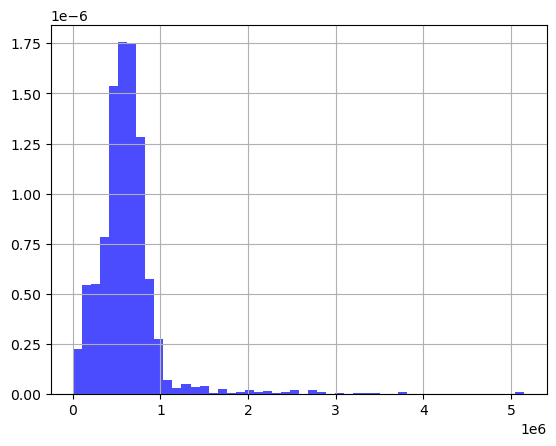

In [33]:
df_final['avg_salary'].hist(bins = 50, density=True, alpha=0.7, color='blue')

In [38]:
df_final[df_final['avg_salary'] > 1500000].count()

titles          39
companies       39
locations       39
reviews         39
descriptions    39
salaries        39
lower           39
upper           39
Paid Rate       39
avg_salary      39
dtype: int64

<Axes: >

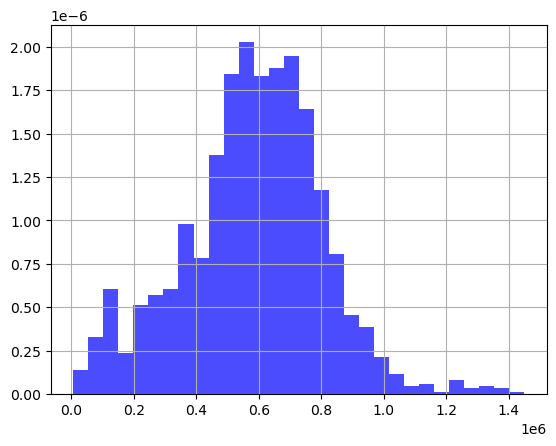

In [43]:
df_final[df_final['avg_salary'] <1500000.0]['avg_salary'].hist(bins = 30, density=True, alpha=0.7, color='blue')

In [236]:

quartile1 = df_final['avg_salary'].quantile(0.05)
quartile3 = df_final['avg_salary'].quantile(0.95)
iqr = quartile3 - quartile1
lower = quartile1 - 1.5 * iqr
upper = quartile3 +1.5 *iqr 


In [237]:
quartile1 -(1.5 * iqr)

-1117500.0

In [239]:

df_final.loc[(df_final['avg_salary'] > upper,'avg_salary')] = upper
df_final.loc[(df_final['avg_salary'] < lower),'avg_salary'] = lower 


<Axes: >

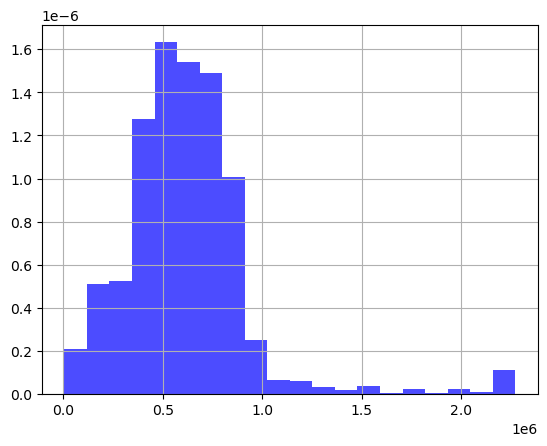

In [240]:
df_final['avg_salary'].hist(bins = 20, density=True, alpha=0.7, color='blue')

In [241]:
df_final['avg_salary'].unique()

array([ 550000.,  500000.,  240000.,  750000.,  700000.,  600000.,
        200000., 2270500.,  800000.,  450000.,  650000.,  850000.,
        444500., 1750000.,  498000.,  306000.,  420000.,  300000.,
        210000.,  400000.,  270000.,  840000.,  432000.,  540000.,
        100000.,  198000.,  360000., 1000000.,  350000.,  150000.,
        192000.,  950000.,  216000.,  204000.,  900000.,  250000.,
       2000000.,  186000.,   60000.,  660000., 1350000., 1250000.,
        462000.,  162000.,  234000.,  510000.,  132000., 1050000.,
        288000.,   90000.,  720000.,  120000.,  258000., 2100000.,
         85000.,   48000.,  474000., 1400000.,  246000.,  180000.,
        264000., 1872000.,   50000., 1700000.,  330000.,  108000.,
        648000.,  570000., 1300000.,  480000.,  140500.,  185000.,
        252000., 1100000.,  144000.,   66000.,   72000.,  558000.,
         16640., 1500000.,  333000.,   10400.,  114000.,  390000.,
        282000.,   30000.,  690000.,    6000.,  422500., 15500

In [242]:
'₹1,800.00 Per hour'.split('P')[0]

'₹1,800.00 '

In [243]:
pd.qcut(df_final['avg_salary'],q=3,precision =1)

0        (500000.0, 700000.0]
1          (5999.9, 500000.0]
2          (5999.9, 500000.0]
3       (700000.0, 2270500.0]
4        (500000.0, 700000.0]
                ...          
1866       (5999.9, 500000.0]
1867     (500000.0, 700000.0]
1868       (5999.9, 500000.0]
1869    (700000.0, 2270500.0]
1870       (5999.9, 500000.0]
Name: avg_salary, Length: 1871, dtype: category
Categories (3, interval[float64, right]): [(5999.9, 500000.0] < (500000.0, 700000.0] < (700000.0, 2270500.0]]

<Axes: >

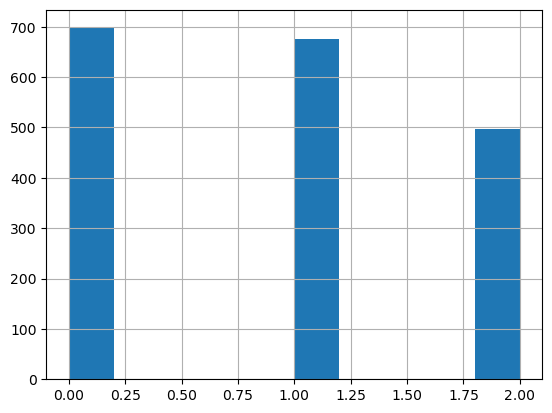

In [244]:
pd.qcut(df_final['avg_salary'],q=3,precision =1,labels = [0,1,2]).hist()

In [245]:
BINS = [0,500000,700000,2300500]

df_final['Salary_Bins'] =pd.cut(x=df_final['avg_salary'], bins=BINS, labels=['0','1','2'])

([<matplotlib.axis.XTick at 0x27ad490b940>,
 [Text(0, 0, '0 - 400000'),
  Text(1, 0, '400000 - 550000'),
  Text(2, 0, '500000 - 650000'),
  Text(3, 0, '650000 - 750000'),
  Text(4, 0, '750000 - 2300500')])

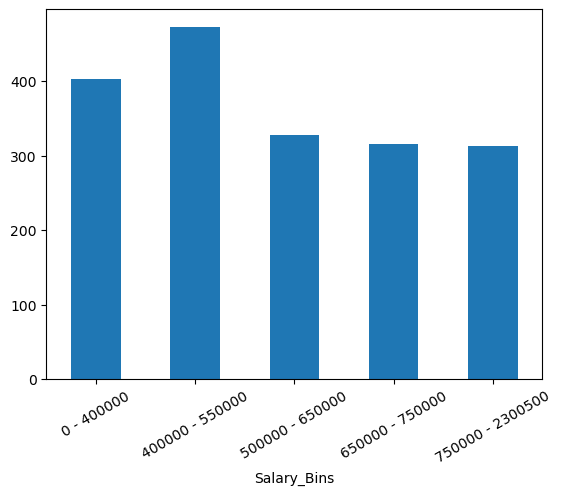

In [149]:
df_final.groupby('Salary_Bins')['descriptions'].count().plot.bar()
plt.xticks([0,1,2],['0 - 400000','400000 - 550000','500000 - 650000','650000 - 750000','750000 - 2300500'],rotation =30)

In [246]:
import unidecode
unidecode.unidecode('Hyderābād')

'Hyderabad'

In [247]:
 df_final['locations'] = df_final['locations'].map(lambda a: unidecode.unidecode(str(a)))

In [248]:
df_final['locations'].unique()

array(['Chennai', 'Bengaluru', 'Remote', 'Gurgaon', 'Mumbai', 'Hyderabad',
       'Jammu', 'Pune', 'Jaipur', 'Ahmedabad', 'Lucknow', 'Indore',
       'Bhubaneshwar', 'India', 'Visakhapatnam', 'Calcutta', 'Noida',
       'Bhilai', 'Mohali', 'Cochin', 'Gandhinagar', 'Calicut', 'Delhi',
       'nan', 'Chandigarh', 'Narasaraopet', 'Kalkaji Devi', 'Nagpur',
       'Thane', 'Durg', 'Jamshedpur', 'Bhopal', 'Eranakulam', 'Vadodara',
       'Coimbatore', 'Thiruvananthapuram', 'Ambala', 'Solan', 'Ujjain',
       'Panipat', 'Raigarh', 'Pitampura', 'Ludhiana', 'Ranchi', 'Salem',
       'Tiruchchirappalli', 'Navi Mumbai', 'Cuddalore', 'Agra', 'Surat',
       'Thanjavur', 'Nagercoil', 'Jodhpur', 'Jalandhar', 'Gangtok',
       'Ghaziabad', 'Rewari', 'Kharar', 'Alandi', 'Panchkula', 'Hat',
       'Telangana', 'Outer Ring Road', 'Maharashtra', 'Khalapur',
       'Kharagpur', 'Madurai', 'Ankleshwar', 'Srinagar'], dtype=object)

In [249]:
in_cities = pd.read_csv('list_of_cities.csv')
city = set(in_cities['Name of City'])
[c for c in df_final['locations'].unique() if c not in city]

['Remote',
 'Bhubaneshwar',
 'India',
 'Calcutta',
 'Bhilai',
 'Cochin',
 'Gandhinagar',
 'Calicut',
 'nan',
 'Kalkaji Devi',
 'Eranakulam',
 'Ambala',
 'Pitampura',
 'Tiruchchirappalli',
 'Navi Mumbai',
 'Cuddalore',
 'Gangtok',
 'Ghaziabad',
 'Alandi',
 'Hat',
 'Telangana',
 'Outer Ring Road',
 'Maharashtra',
 'Khalapur']

In [250]:
city.add('Ghaziabad')
city.add('Gangtok')
city.add('Cuddalore')
city.add('Navi Mumbai')
city.add('Tiruchchirappalli')
city.add('Ambala')
city.add('Eranakulam')
city.add('Calicut')
city.add('Gandhinagar')
city.add('Bhubaneshwar')

In [251]:
df_final.loc[df_final['locations'] == 'Calcutta','locations'] = 'Kolkata'
df_final.loc[df_final['locations'] == 'Cochin','locations'] = 'Kochi'

In [252]:
def ret_city(cit):
    if cit in city:
        return cit
    else:
        return 'Other'

In [253]:
df_final['City'] = df_final['locations'].map(ret_city)

In [254]:
def is_city(cit):
    if cit in city:
        return 1
    else:
        return 0

In [255]:
df_final['is_city'] = df_final['locations'].map(is_city) 

In [256]:
df_final

,titles,companies,locations,reviews,descriptions,salaries,lower,upper,Paid Rate,avg_salary,Salary_Bins,City,is_city
0,CAD Customization,Actalent,Chennai,3.6,Description:\n1. Hands-on expertise in develop...,₹4L - ₹7L,400000.0,700000.0,Yearly,550000.0,1,Chennai,1
1,Advisor-Data Science,Dell Technologies,Bengaluru,4.3,"As a Data Scientist, you will have a crucial r...",₹3L - ₹7L,300000.0,700000.0,Yearly,500000.0,0,Bengaluru,1
2,AI/ML Engineering Intern,Lizmotors Mobility Pvt Ltd.,Remote,None,"At Lizmotors, we're at the forefront of the te...",₹15T - ₹25T,15000.0,25000.0,Monthly,240000.0,0,Other,0
3,Senior Advisor - Machine Learning Engineer,Dell Technologies,Bengaluru,4.3,Data Science is all about breaking new ground ...,₹6L - ₹9L,600000.0,900000.0,Yearly,750000.0,2,Bengaluru,1
4,Data Science Consultant- AI Product Manager,Dell Technologies,Bengaluru,4.3,Data Science is all about breaking new ground ...,₹6L - ₹8L,600000.0,800000.0,Yearly,700000.0,1,Bengaluru,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Android Developer,Meiro Mobility Private Limited,Ahmedabad,None,About the Role\nDeveloping app functionalities...,₹4L - ₹5L,400000.0,500000.0,Yearly,450000.0,0,Ahmedabad,1
1867,Product Innovation Lead,Gemini Software Solutions,Thiruvananthapuram,None,Position Name: Product Innovation Lead\nLocati...,₹5L - ₹6L,500000.0,600000.0,Yearly,550000.0,1,Thiruvananthapuram,1
1868,Senior Software Engineer,Vedicastrologer.ai,Bengaluru,None,Please note the following information:\nWe are...,₹10T - ₹15T,10000.0,15000.0,Monthly,150000.0,0,Bengaluru,1
1869,Sr Power Bi Support Engineer,Serendipity Corporate Services,Pune,None,Responsibilities\nMonitor BIE nightly data pip...,₹22L,0.0,2200000.0,Yearly,1100000.0,2,Pune,1


In [257]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.replace(r"\n",' ')
    df[text_field] = df[text_field].str.lower()
    return df

In [258]:
df_final["combined_text"] = df_final["titles" ] + " "+ df_final["descriptions"]

In [259]:
standardize_text(df_final,"combined_text")['combined_text'][0]

C:\Users\sendh\AppData\Local\Temp\ipykernel_24960\540289982.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df[text_field] = df[text_field].str.replace(r"http\S+", "")
C:\Users\sendh\AppData\Local\Temp\ipykernel_24960\540289982.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df[text_field] = df[text_field].str.replace(r"@\S+", "")
C:\Users\sendh\AppData\Local\Temp\ipykernel_24960\540289982.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
C:\Users\sendh\AppData\Local\Temp\ipykernel_24960\540289982.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df[text_field] = df[text_field].str.replace(r"\n",' ')


"cad customization description  1  hands on expertise in developing  a  automation projects in catia b  customization in catia c  macros scripts and add ins in ms excel 2  expertise in following technologies (min  any 3 from below)  a  vba b  vb net c  catscript d  python e  java javascript f  other similar technologies 3  excellent knowledge of using catia   vismockup api's (for automation)   using vba   python 4  added advantage to have  a  alteryx b  machine learning skills tools c  modeling   drafting knowledge using catia d  teamcenter   vismockup 5  responsible to  a  gather requirements from end users b  conduct feasibility studies   propose solutions c  create proof of concept (poc) with selected architectural approach d  design, develop and test concepts e  create documentation 6  good presentation and communication skills 7  job role based on relevant experience skills  fixture, design, catia, biw fixture top skills details  fixture,design,catia,biw fixture additional skills 

<Axes: >

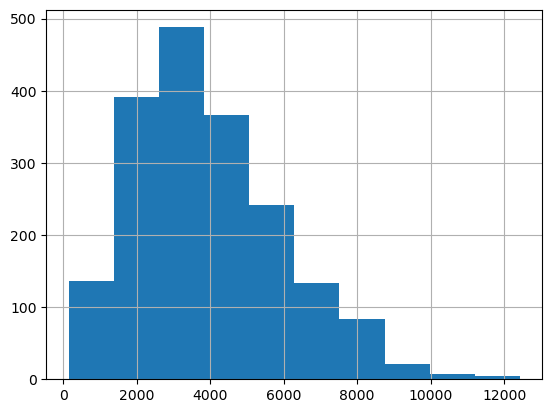

In [260]:
df_final['combined_text'].map(lambda a: len(a)).hist()

In [261]:
max?

Docstring:
max(iterable, *[, default=obj, key=func]) -> value
max(arg1, arg2, *args, *[, key=func]) -> value

With a single iterable argument, return its biggest item. The
default keyword-only argument specifies an object to return if
the provided iterable is empty.
With two or more arguments, return the largest argument.
Type:      builtin_function_or_method

In [262]:
max_len = max(df_final['combined_text'].map(lambda a: len(a)))
longest_text = df_final[df_final['combined_text'].map(lambda a: len(a) == max_len)]['combined_text']

In [263]:
df_final.iloc[635]['combined_text']

"esg data operations analyst data operations bring clarity to our clients  investment decisions by collecting, processing and distributing industry leading data  esg investing shape the future of esg could you make esg   or environment, social and governance   more central to investment decisions? we ve dedicated over 45 years to measuring and modeling esg characteristics, and today we work with over 3,000 clients worldwide  working in esg is your opportunity to create value that really matters for your career, our clients, and the future we all share  your team responsibilities msci esg research has a suite of research and data products designed to help institutional investors understand how esg factors can impact the long term risk and return profile of their investments  these factors include esg ratings, business activities based screening, norms   controversies, sustainable impact, and corporate governance data  msci esg research provides innovative tools designed to help clients 

In [264]:
def process_words(job_descriptions):
    jd_data=[]
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    stopwords_list = stopwords.words('english')
    stopwords_list += list(string.punctuation)
    stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    stopwords_list += list(string.ascii_lowercase)
    
    for jd in job_descriptions:
        jd_tokens_raw = nltk.regexp_tokenize(jd, pattern)
        jd_tokens=[word.lower() for word in jd_tokens_raw]
        jd_words_stopped = [word for word in jd_tokens if word not in stopwords_list]
        jd_data.append(jd_words_stopped)
    return pd.Series(jd_data)
                
    

In [265]:
text = process_words(df_final['combined_text']).map(' '.join)

In [266]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sendh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [267]:
tokenized = process_words(df_final['combined_text'])

In [268]:
tokenized[0]

['cad',
 'customization',
 'description',
 'hands',
 'expertise',
 'developing',
 'automation',
 'projects',
 'catia',
 'customization',
 'catia',
 'macros',
 'scripts',
 'add',
 'ins',
 'ms',
 'excel',
 'expertise',
 'following',
 'technologies',
 'min',
 'vba',
 'vb',
 'net',
 'catscript',
 'python',
 'java',
 'javascript',
 'similar',
 'technologies',
 'excellent',
 'knowledge',
 'using',
 'catia',
 'vismockup',
 "api's",
 'automation',
 'using',
 'vba',
 'python',
 'added',
 'advantage',
 'alteryx',
 'machine',
 'learning',
 'skills',
 'tools',
 'modeling',
 'drafting',
 'knowledge',
 'using',
 'catia',
 'teamcenter',
 'vismockup',
 'responsible',
 'gather',
 'requirements',
 'end',
 'users',
 'conduct',
 'feasibility',
 'studies',
 'propose',
 'solutions',
 'create',
 'proof',
 'concept',
 'poc',
 'selected',
 'architectural',
 'approach',
 'design',
 'develop',
 'test',
 'concepts',
 'create',
 'documentation',
 'good',
 'presentation',
 'communication',
 'skills',
 'job',
 'role

In [269]:
all_text = [ word for text in tokenized for word in text]
fdist  = FreqDist(all_text)
fdist.most_common(100)

[('data', 11680),
 ('experience', 9510),
 ('work', 6289),
 ('business', 5830),
 ('team', 4966),
 ('skills', 4474),
 ('development', 3546),
 ('knowledge', 3050),
 ('solutions', 2963),
 ('management', 2943),
 ('software', 2841),
 ('design', 2807),
 ('working', 2800),
 ('job', 2726),
 ('years', 2665),
 ('ability', 2586),
 ('support', 2526),
 ('technical', 2514),
 ('technology', 2511),
 ('strong', 2434),
 ('role', 2281),
 ('engineering', 2250),
 ('requirements', 2166),
 ('services', 2152),
 ('tools', 2122),
 ('us', 2114),
 ('teams', 2070),
 ('cloud', 2070),
 ('world', 2051),
 ('systems', 2011),
 ('analysis', 1983),
 ('required', 1980),
 ('product', 1943),
 ('learning', 1928),
 ('global', 1926),
 ('quality', 1881),
 ('new', 1860),
 ('analytics', 1792),
 ('understanding', 1784),
 ('across', 1778),
 ('people', 1768),
 ('environment', 1764),
 ('process', 1713),
 ('time', 1690),
 ('including', 1654),
 ('customer', 1649),
 ('develop', 1648),
 ('using', 1640),
 ('technologies', 1635),
 ('engineer

In [270]:
all_text = [ word for text in tokenized for word in text]
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(all_text)
scored = finder.score_ngrams(bigram_measures.raw_freq)

In [271]:
scored

[(('machine', 'learning'), 0.0015766882463770168),
 (('years', 'experience'), 0.0012069527276848324),
 (('problem', 'solving'), 0.0011191228343556544),
 (('communication', 'skills'), 0.0011007068889801817),
 (('data', 'science'), 0.0009094643793118103),
 (('computer', 'science'), 0.0008839653780226941),
 (('equal', 'opportunity'), 0.0008485500984544772),
 (('best', 'practices'), 0.0008386338201753765),
 (('job', 'description'), 0.000810301596520803),
 (('full', 'time'), 0.0007876358175971441),
 (('experience', 'working'), 0.000779136150500772),
 (('sexual', 'orientation'), 0.000762136816308028),
 (('data', 'analysis'), 0.0007479707044807411),
 (('opportunity', 'employer'), 0.0007394710373843692),
 (('data', 'analytics'), 0.000718221869643439),
 (('national', 'origin'), 0.0006983893130852375),
 (('cross', 'functional'), 0.0006856398124406794),
 (('hands', 'experience'), 0.0006686404782479353),
 (('gender', 'identity'), 0.0006558909776033772),
 (('skills', 'ability'), 0.00063180858749698

In [272]:
all_text = [ word for text in tokenized for word in text]
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(all_text)
finder.apply_freq_filter(30)
scored = finder.score_ngrams(bigram_measures.pmi)
scored

[(('sky', 'seas'), 14.071572728626139),
 (('tamil', 'nadu'), 14.002859978542123),
 (('restlessly', 'reinventing'), 13.814414889129013),
 (('seabed', 'outer'), 13.57114373811665),
 (('axa', 'xl'), 13.541396394722597),
 (('silicon', 'valley'), 13.451844809744307),
 (('screen', 'readers'), 13.451844809744305),
 (('political', 'affiliation'), 13.313200099154272),
 (('united', 'states'), 13.308886855902262),
 (('jpmorgan', 'chase'), 13.26136756848462),
 (('disaster', 'recovery'), 13.22749087207457),
 (('asked', 'confirm'), 13.107196638356859),
 (('uttar', 'pradesh'), 13.107196638356859),
 (('legacy', 'century'), 13.095969382933605),
 (('greatest', 'invention'), 13.079317605781421),
 (('teammate', 'welcoming'), 13.026538975011634),
 (('award', 'winning'), 13.008207543725492),
 (('ncr', 'voyix'), 12.969693114606924),
 (('american', 'express'), 12.926936427979776),
 (('welcoming', 'respectful'), 12.92478069273135),
 (('stands', 'still'), 12.876783654092263),
 (('early', 'adopter'), 12.84416223

In [273]:
!pip install wordcloud

In [274]:
df_final['combined_text']

0       cad customization description  1  hands on exp...
1       advisor data science as a data scientist, you ...
2       ai ml engineering intern at lizmotors, we're a...
3       senior advisor   machine learning engineer dat...
4       data science consultant  ai product manager da...
                              ...                        
1866    android developer about the role developing ap...
1867    product innovation lead position name  product...
1868    senior software engineer please note the follo...
1869    sr power bi support engineer responsibilities ...
1870    intern   qa engineer   rs 5000 month   minimum...
Name: combined_text, Length: 1871, dtype: object

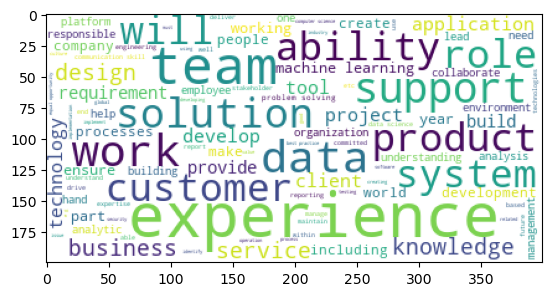

In [275]:
from wordcloud import WordCloud, STOPWORDS
stop = set(STOPWORDS)
text = ' '.join(i for i in df_final['combined_text'])
cloud = WordCloud(stopwords=stop,max_font_size=50,max_words=100,background_color='white',random_state=1).generate(text)
plt.imshow(cloud)

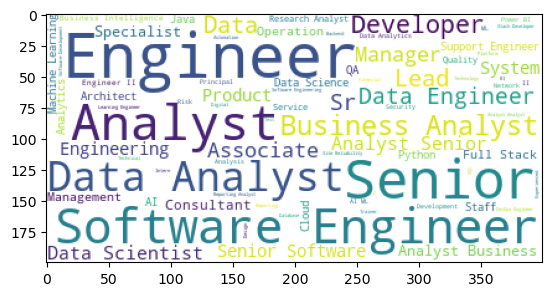

In [276]:
from wordcloud import WordCloud, STOPWORDS
stop = set(STOPWORDS)
text = ' '.join(i for i in df_final['titles'])
cloud = WordCloud(stopwords=stop,max_font_size=50,max_words=100,background_color='white',random_state=1).generate(text)
plt.imshow(cloud)

In [277]:
salary_df = df_final[['titles','reviews','Paid Rate','avg_salary','City','is_city','combined_text','Salary_Bins']]

In [278]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   titles         1871 non-null   object  
 1   reviews        1871 non-null   object  
 2   Paid Rate      1871 non-null   object  
 3   avg_salary     1871 non-null   float64 
 4   City           1871 non-null   object  
 5   is_city        1871 non-null   int64   
 6   combined_text  1871 non-null   object  
 7   Salary_Bins    1871 non-null   category
dtypes: category(1), float64(1), int64(1), object(5)
memory usage: 104.4+ KB


In [279]:
salary_df.to_csv('salary_df2.csv')

In [280]:
import re
p = re.compile(r"([a-zA-Z]+(?:'[a-z]+)?)")
count =0
for m in p.finditer(df_final['combined_text'][1]):
    print(m.start(), m.group())
    count += len(m.group())

0 advisor
8 data
13 science
21 as
24 a
26 data
31 scientist
42 you
46 will
51 have
56 a
58 crucial
66 role
71 in
74 shaping
82 our
86 data
91 driven
98 decision
107 making
114 process
123 this
128 role
133 involves
142 applying
151 advanced
160 knowledge
170 of
173 generative
184 ai
187 models
195 large
201 language
210 models
218 llms
225 deep
230 learning
240 and
244 reinforcement
258 learning
267 principles
279 the
283 candidate
293 will
298 be
301 required
310 to
313 develop
321 impactful
331 data
336 models
343 and
347 predictive
358 algorithms
370 create
377 compelling
388 recommendations
404 based
410 on
413 data
418 insights
428 lead
433 partnerships
446 with
451 the
455 academic
464 and
468 business
477 community
488 and
492 influence
502 strategic
512 decisions
523 we
526 are
530 looking
538 for
542 a
544 seasoned
553 data
558 scientist
568 who
572 can
576 transform
586 complex
594 data
599 into
604 actionable
615 insights
625 lead
630 challenging
642 ai
645 projects
655 and
